In [9]:
#LSD: a Line Segment Detector Implementating this paper  by Rafael Grompone von Gioi1, J´er´emie Jakubowicz2, Jean-Michel Morel,
#Gregoy Randall4

import cv2 
#reading Image 
img = cv2.imread("C:\\Users\Hp\Desktop\course_Assignment USD\courseAssignment\Computer Vision\dls\photo1.jpg")

In [10]:
#converting to gray scale 
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

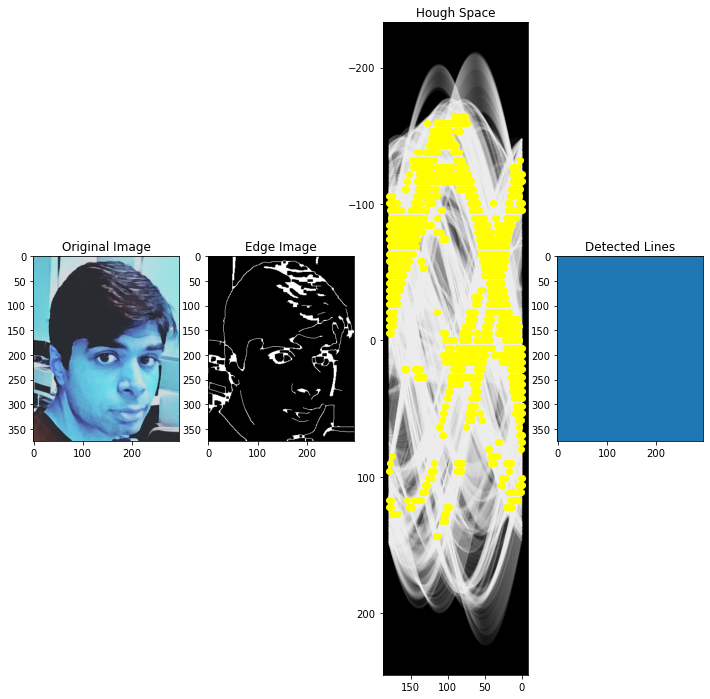

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
X1 = [] , X2 = [] , Y1= [] , Y2= []
def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas  # finding the steps  of the angle
  drho = (2 * d) / num_rhos  # finding the steps of the roh 
  #
  thetas = np.arange(0, 180, step=dtheta) # calculating the values of theta 
  rhos = np.arange(-d, d, step=drho)    # calculating the values of the rows
  #
  cos_thetas = np.cos(np.deg2rad(thetas)) # calculating corresponding value of the cose theta 
  sin_thetas = np.sin(np.deg2rad(thetas)) # calculating the corresponding value of sine theta
  #
  accumulator = np.zeros((len(rhos), len(rhos))) # creating acculmulator of size rohs 
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image , cmap ="gray")
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half] # calaculating the mid point in the line 
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho)) # matching the obtained row 
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = (a * rho) + edge_width_half # this is the points in the line 
        y0 = (b * rho) + edge_height_half # finding the end points in the identified line
        x1 = int(x0 + 1000 * (-b)) # it is to define the endpoints of the lines so that they go to (and past) 
                                    # the sides of the image when drawing the lines
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        X1.append(x1)
        X2.append(x2)
        Y1.append(y1)
        Y2.append(y2)
        # ploting the line 
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        #subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))
  
  # from math import sqrt 
  # dist = []    
  # #calcualting the largest line in the image 
  # for point1 in zip(X1 ,Y1):
  #   for point2 in zip(X2, Y2):
  #     dist.append(math.dist(point1 , point2))
  

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas


if __name__ == "__main__":
  image = cv2.imread("photo1.jpg")
  edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
  edge_image = cv2.Canny(edge_image, 100, 200)
  edge_image = cv2.dilate(
      edge_image,
      cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
      iterations=1
  )
  edge_image = cv2.erode(
      edge_image,
      cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
      iterations=1
  )
  line_detection_non_vectorized(image, edge_image)

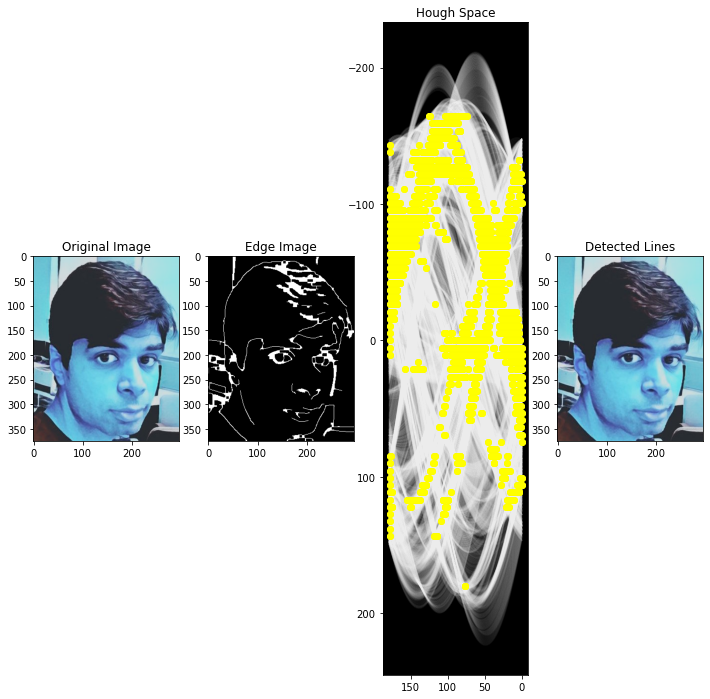

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def line_detection_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  edge_points = np.argwhere(edge_image != 0)
  edge_points = edge_points - np.array([[edge_height_half, edge_width_half]])
  #
  rho_values = np.matmul(edge_points, np.array([sin_thetas, cos_thetas]))
  #
  accumulator, theta_vals, rho_vals = np.histogram2d(
      np.tile(thetas, rho_values.shape[0]),
      rho_values.ravel(), # converting into oned flatten array 
      bins=[thetas, rhos]
  )
  accumulator = np.transpose(accumulator)
  lines = np.argwhere(accumulator > t_count)
  rho_idxs, theta_idxs = lines[:, 0], lines[:, 1]
  r, t = rhos[rho_idxs], thetas[theta_idxs]

  for ys in rho_values:
    subplot3.plot(thetas, ys, color="white", alpha=0.05)

  subplot3.plot([t], [r], color="yellow", marker='o')

  for line in lines:
    y, x = line
    rho = rhos[y]
    theta = thetas[x]
    a = np.cos(np.deg2rad(theta))
    b = np.sin(np.deg2rad(theta))
    x0 = (a * rho) + edge_width_half
    y0 = (b * rho) + edge_height_half
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    subplot3.plot([theta], [rho], marker='o', color="yellow")
    #subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas


if __name__ == "__main__":
    image = cv2.imread("photo1.jpg")
    edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
    edge_image = cv2.Canny(edge_image, 100, 200)
    edge_image = cv2.dilate(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )
    edge_image = cv2.erode(
        edge_image,
        cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
        iterations=1
    )
    line_detection_vectorized(image, edge_image)